# Project 1 Starter Notebook

This notebook is meant to help you start up easily.
It will assume you have downloaded the relevant data.
For more information about the competition, refer to the kaggle pages.

Let's load in and inspect all data first:

In [1]:
import pandas as pd
import numpy as np

# read in data
bicycle_data = pd.read_csv("input/bicycle-counter-prediction/train_data.csv")
bicycle_data.head()

,Date_hour,Totaal
0,2023-01-01T00,111.0
1,2023-01-01T01,201.0
2,2023-01-01T02,170.0
3,2023-01-01T03,144.0
4,2023-01-01T04,155.0


In [2]:
test_data = pd.read_csv("input/bicycle-counter-prediction/test_data.csv")
test_data.head()

,Id,Date_hour
0,0,2023-07-01T00
1,1,2023-07-01T01
2,2,2023-07-01T02
3,3,2023-07-01T03
4,4,2023-07-01T04


In [3]:
# read in data
weather_rawdata = pd.read_csv("input/bicycle-counter-prediction/open-meteo-51.10N3.70E13m.csv", skiprows=2)
weather_rawdata.head()

,time,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),weathercode (wmo code),cloudcover (%),is_day ()
0,2023-01-01T00:00,15.8,9.3,0.0,3.0,86.0,0
1,2023-01-01T01:00,15.3,8.9,0.0,3.0,80.0,0
2,2023-01-01T02:00,14.7,8.8,0.0,2.0,70.0,0
3,2023-01-01T03:00,14.3,9.0,0.0,3.0,99.0,0
4,2023-01-01T04:00,13.8,9.3,0.0,2.0,70.0,0


In [14]:
school_holidays_data = pd.read_csv("input/bicycle-counter-prediction/school_holidays.csv", sep = ";")
school_holidays_data.head()
school_holidays = dict(school_holidays_data["name"]:[school_holidays_data["start"], school_holidays_data["end"]])

SyntaxError: invalid syntax (5598603.py, line 3)

The weather data downloaded from open meteo carries times in a slightly different format than the bicycle counter data.
Note that you are encouraged to create and download your own weather data with more features.
The following code converts this data:

In [10]:
import datetime
import holidays

weather_data = weather_rawdata.copy()
weather_data["Date_hour"] = weather_data["time"].str.split(':', expand = True)[0]
weather_data = weather_data.drop("time", axis = 1)
date_time = pd.to_datetime(weather_data['Date_hour'])
weather_data['weekday'] = date_time.dt.strftime('%A')
weather_data['hour'] = date_time.dt.hour
weather_data['is_school_hours'] = ((date_time.dt.hour >= 8) & (date_time.dt.hour <= 17)).astype(int)
weather_data['is_weekend'] = (weather_data['weekday'].isin(["Saturday", "Sunday"])).astype(int)
belgian_holidays = holidays.Belgium(years=2023)
weather_data['is_public_holiday'] = (date_time.dt.date.isin(belgian_holidays)).astype(int)
#weather_data['is_bridge_day'] =
weather_data["is_school_holiday"] = 

weather_data.columns = weather_data.columns.str.split(' ').str[0]
weather_data.head()

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6619    0.0
6620    0.0
6621    0.0
6622    0.0
6623    0.0
Length: 6624, dtype: float64


TypeError: unsupported operand type(s) for &: 'float' and 'float'

In [ ]:

dummies = pd.get_dummies(weather_data.Weekday)
dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [ ]:
weather_data = pd.concat([weather_data, dummies], axis=1)
weather_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,Weekday,Hour,Working_hours,Weekend,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,1,1,0,0,0,1,0,0,0
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,1,1,0,0,0,1,0,0,0
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,1,1,0,0,0,1,0,0,0
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,1,1,0,0,0,1,0,0,0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,1,1,0,0,0,1,0,0,0


The following code merges the bicycle data with the weather data to get a train set:

In [ ]:
train_data = weather_data.merge(bicycle_data, on = "Date_hour")
train_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,Weekday,Hour,Working_hours,Weekend,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Totaal
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,1,1,0,0,0,1,0,0,0,111.0
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,1,1,0,0,0,1,0,0,0,201.0
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,1,1,0,0,0,1,0,0,0,170.0
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,1,1,0,0,0,1,0,0,0,144.0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,1,1,0,0,0,1,0,0,0,155.0


The following does the same but then for the test set:

In [ ]:
test_data = weather_data.merge(test_data, on = "Date_hour")
test_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,Weekday,Hour,Working_hours,Weekend,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Id
0,18.0,15.7,0.0,3.0,100.0,0,2023-07-01T00,Saturday,0,0,1,0,0,0,1,0,0,0,0,0
1,17.7,15.3,0.0,3.0,100.0,0,2023-07-01T01,Saturday,1,0,1,0,0,0,1,0,0,0,0,1
2,17.4,15.0,0.0,3.0,100.0,0,2023-07-01T02,Saturday,2,0,1,0,0,0,1,0,0,0,0,2
3,17.2,15.0,0.0,3.0,100.0,0,2023-07-01T03,Saturday,3,0,1,0,0,0,1,0,0,0,0,3
4,17.1,15.3,0.0,3.0,100.0,1,2023-07-01T04,Saturday,4,0,1,0,0,0,1,0,0,0,0,4


In [ ]:
ground_truth = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2023-gent.csv", sep = ";")
ground_truth.head()

,﻿Code,Locatie,Datum,Uur5Minuten,Ordening,Totaal,Tegenrichting,Hoofdrichting
0,COU,Coupure-Links,2023-01-01,0:00:00,2023-01-01T00:00:00+01:00,7.0,4.0,3.0
1,COU,Coupure-Links,2023-01-01,0:05:00,2023-01-01T00:05:00+01:00,2.0,0.0,2.0
2,COU,Coupure-Links,2023-01-01,0:10:00,2023-01-01T00:10:00+01:00,1.0,0.0,1.0
3,COU,Coupure-Links,2023-01-01,0:15:00,2023-01-01T00:15:00+01:00,8.0,4.0,4.0
4,COU,Coupure-Links,2023-01-01,0:20:00,2023-01-01T00:20:00+01:00,5.0,2.0,3.0


In [ ]:
gold_data = ground_truth.copy()
gold_data["Date_hour"] = ground_truth['Ordening'].str.extract(r'^(.*?T\d{2})..')
gold_data = gold_data.groupby(['Datum', 'Date_hour'])['Totaal'].sum().reset_index(name ='Totaal')
gold_data = weather_data.merge(gold_data, on = "Date_hour")
gold_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,Weekday,Hour,Working_hours,...,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Datum,Totaal
0,15.8,9.3,0.0,3.0,86.0,0,2023-01-01T00,Sunday,0,0,...,1,0,0,0,1,0,0,0,2023-01-01,111.0
1,15.3,8.9,0.0,3.0,80.0,0,2023-01-01T01,Sunday,1,0,...,1,0,0,0,1,0,0,0,2023-01-01,201.0
2,14.7,8.8,0.0,2.0,70.0,0,2023-01-01T02,Sunday,2,0,...,1,0,0,0,1,0,0,0,2023-01-01,170.0
3,14.3,9.0,0.0,3.0,99.0,0,2023-01-01T03,Sunday,3,0,...,1,0,0,0,1,0,0,0,2023-01-01,144.0
4,13.8,9.3,0.0,2.0,70.0,0,2023-01-01T04,Sunday,4,0,...,1,0,0,0,1,0,0,0,2023-01-01,155.0


In [ ]:
gtest_data = gold_data[(gold_data['Datum'] >= '2023-07-01') & (gold_data['Datum'] <= '2023-07-31')]
gtest_data.head()

,temperature_2m,apparent_temperature,precipitation,weathercode,cloudcover,is_day,Date_hour,Weekday,Hour,Working_hours,...,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Datum,Totaal
4343,18.0,15.7,0.0,3.0,100.0,0,2023-07-01T00,Saturday,0,0,...,0,0,0,1,0,0,0,0,2023-07-01,150.0
4344,17.7,15.3,0.0,3.0,100.0,0,2023-07-01T01,Saturday,1,0,...,0,0,0,1,0,0,0,0,2023-07-01,92.0
4345,17.4,15.0,0.0,3.0,100.0,0,2023-07-01T02,Saturday,2,0,...,0,0,0,1,0,0,0,0,2023-07-01,49.0
4346,17.2,15.0,0.0,3.0,100.0,0,2023-07-01T03,Saturday,3,0,...,0,0,0,1,0,0,0,0,2023-07-01,36.0
4347,17.1,15.3,0.0,3.0,100.0,1,2023-07-01T04,Saturday,4,0,...,0,0,0,1,0,0,0,0,2023-07-01,57.0


## Models

### Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = gold_data.loc[:, gold_data.columns != "Totaal"].select_dtypes(include=np.number)
y = gold_data["Totaal"]

X_new = SelectKBest(f_classif, k=5).fit_transform(X, y)

print(X_new)

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
features = ['temperature_2m', 'precipitation', 'is_day', 'is_weekend', 'hour', 'is_public_holiday'] + weekdays

[[15.8  9.3  0.   0.   0. ]
 [15.3  8.9  0.   1.   0. ]
 [14.7  8.8  0.   2.   0. ]
 ...
 [17.  16.2  0.  21.   0. ]
 [16.5 15.6  0.  22.   0. ]
 [16.  15.1  0.  23.   0. ]]


In [ ]:
y_train = train_data["Totaal"]
X_train = train_data.loc[:, features]

y_test = gtest_data["Totaal"]
X_test = gtest_data.loc[:, features]

### Preprocessing

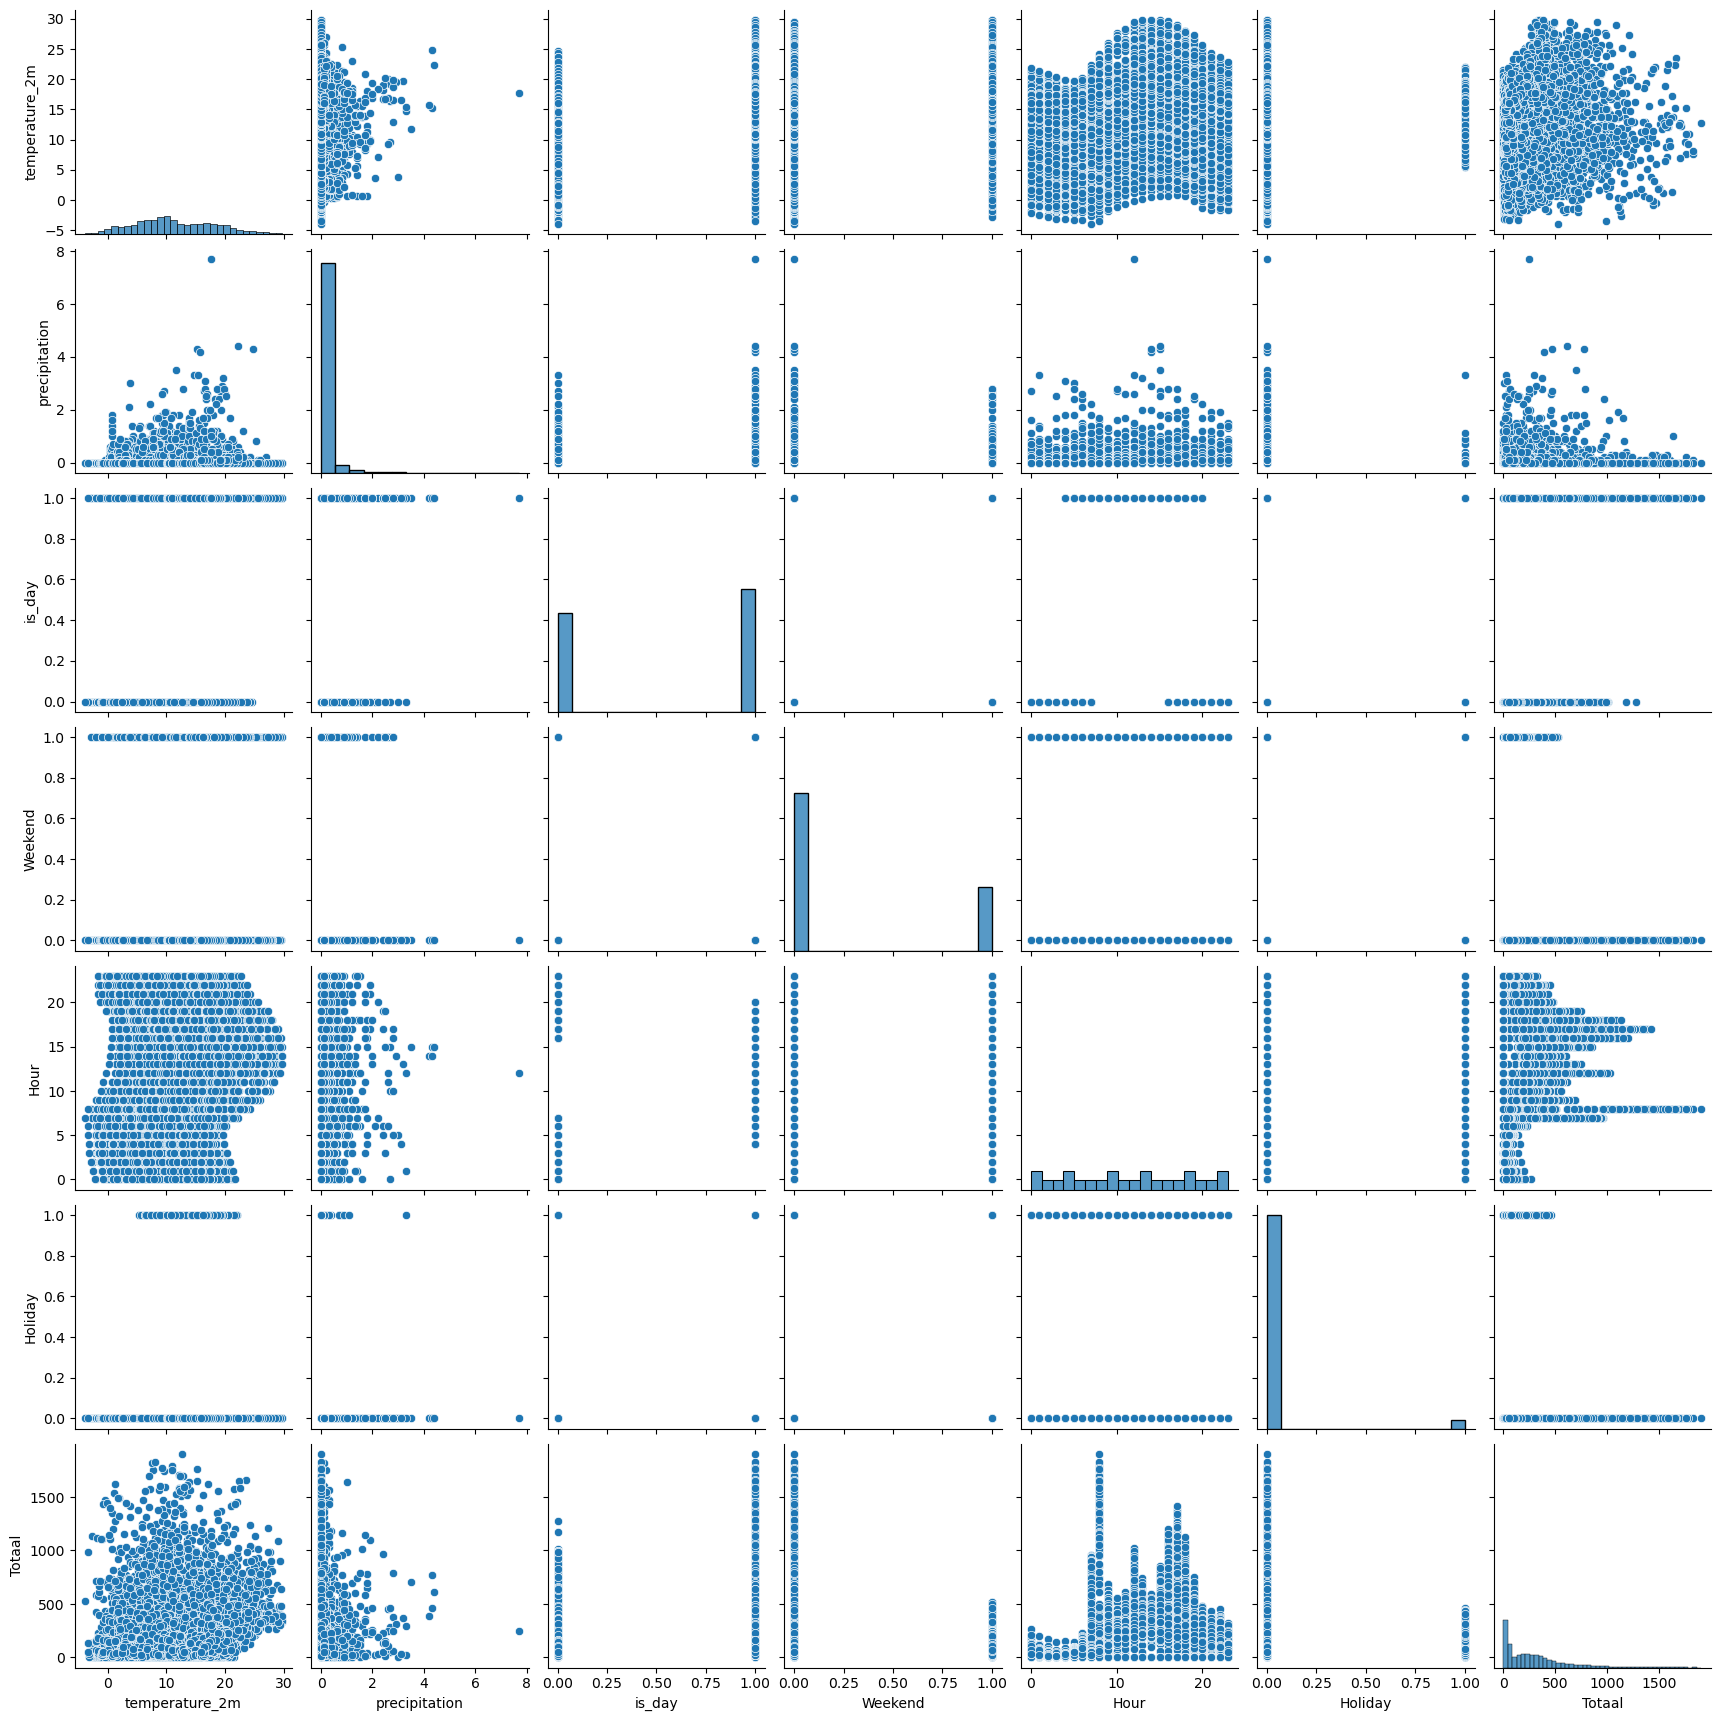

In [144]:
import seaborn as sns

plot_features = ['temperature_2m', 'precipitation', 'is_day', 'is_weekend', 'hour', 'is_public_holiday']
sns.pairplot(gold_data.loc[:,plot_features + ['Totaal']])

In [133]:
# Function to compute MSE
def compute_MSE(y_true, y_predicted):
    """Obtain MSE between true y's and predicted y's"""
    return(np.mean((y_true-y_predicted)**2))

### Linear Regression

In [134]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

LinReg = make_pipeline(StandardScaler(), LinearRegression()) # call an instance of the class LinearRegression

LinReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = LinReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = LinReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = LinReg.score(X_train, y_train) # Training set R²
R_test = LinReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

formula = 'Totaal ~ ' + '+'.join(features)
print(type(formula))

model = smf.ols(formula=formula, 
                data=train_data).fit()
  
# model summary 
print(model.summary()) 


Training set MSE: 64454.338695070765
Test set MSE: 36295.6674666944
Train set R²: 0.362439011131342
Test set R²: -0.02445389677632437
<class 'str'>
                            OLS Regression Results                            
Dep. Variable:                 Totaal   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     223.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:41:06   Log-Likelihood:                -30209.
No. Observations:                4343   AIC:                         6.044e+04
Df Residuals:                    4331   BIC:                         6.052e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|    

### Poisson Regression

In [135]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import r2_score

PoiReg = make_pipeline(StandardScaler(), PoissonRegressor(alpha = 1, solver = "newton-cholesky")) # call an instance of the class LinearRegression

PoiReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = PoiReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = PoiReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = r2_score(y_train, y_hat_train) # Training set R²
R_test = r2_score(y_test, y_hat_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 61743.73545186372
Test set MSE: 35279.984895853755
Train set R²: 0.38925140140883063
Test set R²: 0.004213986753859866


### Ridge Regression

In [136]:
from sklearn.linear_model import Ridge 

RidReg = make_pipeline(StandardScaler(), Ridge()) # call an instance of the class LinearRegression

RidReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RidReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = RidReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = RidReg.score(X_train, y_train) # Training set R²
R_test = RidReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 64454.34002772956
Test set MSE: 36292.202709556
Train set R²: 0.36243899794912227
Test set R²: -0.02435610317726522


### Decision Tree Regression

In [137]:
from sklearn.tree import DecisionTreeRegressor

DTReg = DecisionTreeRegressor()

DTReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = DTReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = DTReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = DTReg.score(X_train, y_train) # Training set R²
R_test = DTReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 653.5587535497735
Test set MSE: 54676.834677419356
Train set R²: 0.9935352130883188
Test set R²: -0.5432667383807321


### Random Forest Regression

In [138]:
from sklearn.ensemble import RandomForestRegressor

RFReg = RandomForestRegressor()

RFReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = RFReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = RFReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = RFReg.score(X_train, y_train) # Training set R²
R_test = RFReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 4470.978797364037
Test set MSE: 42460.19702132203
Train set R²: 0.955774557291731
Test set R²: -0.19844921811394967


### Gradient Boosting Regression

In [142]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

GBReg = make_pipeline(StandardScaler(), GradientBoostingRegressor(loss= 'huber',
                                                                  learning_rate = 0.013, # !
                                                                  n_estimators = 100,
                                                                  subsample = 1,
                                                                  criterion = 'friedman_mse',
                                                                  min_samples_split = 2,
                                                                  min_samples_leaf = 1,
                                                                  min_weight_fraction_leaf = 0,
                                                                  max_depth = 4, # !
                                                                  min_impurity_decrease = 0,
                                                                  alpha = 0.9))

GBReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = GBReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = GBReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = GBReg.score(X_train, y_train) # Training set R²
R_test = GBReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 48246.706629166794
Test set MSE: 11953.874197137311
Train set R²: 0.522759544028957
Test set R²: 0.662599041219765


## Submission

### Prediction

In [633]:
#X0 = np.ones((len(test_data["Id"]),1))
#X = np.hstack((X0, test_data.loc[:, features]))

X = test_data.loc[:, features]

LinReg_predictions = LinReg.predict(X)
PoiReg_predictions = PoiReg.predict(X)
RidReg_predictions = RidReg.predict(X)
DTReg_predictions = DTReg.predict(X)
GBReg_predictions = GBReg.predict(X)

predictions = {"LinReg": LinReg_predictions, 
               "PoiReg": PoiReg_predictions, 
               "DTReg": DTReg_predictions, 
               "RidReg": RidReg_predictions,
               "GBReg": GBReg_predictions}

### Save results

In [634]:
# format predictions with Ids into dataframe and save to csv.

for model in predictions:
    file = pd.DataFrame([test_data["Id"], predictions[model]]).T
    file.columns = ["Id", "Predicted"]
    file.to_csv("input/bicycle-counter-prediction/" + model + ".csv", index = False)